<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity_Gradients_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradients

Previously, we saw how to estimate the derivative of a function at a point using the forward and backward difference approaches, and on your homework you'll explore the central difference approach.  Even though the math is fairly straightforward, it might not surprise you that there is a numpy function that can help with this.  Today we'll play with the "gradient" function.

First let's look at the help function for the gradient function:

In [16]:
import numpy as np
help(np.gradient)

Help on function gradient in module numpy:

gradient(f, *varargs, axis=None, edge_order=1)
    Return the gradient of an N-dimensional array.
    
    The gradient is computed using second order accurate central differences
    in the interior points and either first or second order accurate one-sides
    (forward or backwards) differences at the boundaries.
    The returned gradient hence has the same shape as the input array.
    
    Parameters
    ----------
    f : array_like
        An N-dimensional array containing samples of a scalar function.
    varargs : list of scalar or array, optional
        Spacing between f values. Default unitary spacing for all dimensions.
        Spacing can be specified using:
    
        1. single scalar to specify a sample distance for all dimensions.
        2. N scalars to specify a constant sample distance for each dimension.
           i.e. `dx`, `dy`, `dz`, ...
        3. N arrays to specify the coordinates of the values along each
        

There's a lot there.  The most important parts are that the gradient function requires one argument, an array, and returns a set of arrays which are derivatives along various dimensions of this input.  This array represents the dependent variables of our data.  There are other optional arguments which correspond to the independent variables, which in one dimension is the x-values and in high dimensions correspond to x, y, z, etc.

Let's deal with the 1-D case first.  First consider an array of points coming from the function:

$f\left(x\right) = 5 x + 1$

For simplicity, let's consider 10 datapoints, spaced every $dx = 0.5$ over the range $0 \leq x < 5$:

In [17]:
x = np.arange(0,5,0.5)
y = 5 * x + 1
print("The x-array is:",x)
print("The y-array is:",y)

The x-array is: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
The y-array is: [ 1.   3.5  6.   8.5 11.  13.5 16.  18.5 21.  23.5]


Use the gradient function on the y-array

In [18]:
np.gradient(y)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

This isn't the correct result for the slope of our function.  We didn't tell the gradient function how far apart our values are in $x$, so it assumed that $dx = 1.0$.  We can fix this by feeding into the function the corresponding $x$ values:

In [19]:
np.gradient(y,x)

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

Now we actually get the derivative we expect.

Note that the gradient function returns the derivative at every point in the array that you feed in.  This makes it particularly useful if you have many datapoints and you want to quickly calculate the derivative at all of them, as we'll do below.

**Activity** Use the numpy gradient function to calculate the derivative of 

$f\left(x\right) = \sin \left(x\right)$ 

over the range of $-2 \pi \leq x \leq 2\pi$.  To do this, define an array of $x$ values from $-2 \pi$ to $2 \pi$, and another array of the corresponding y-values.  Use the numpy gradient function to numerically estimate the derivative.  Then, compare this result to the exact derivative at the same $x$ values using a graph.  How do these results change as you alter the number of points in your $x$ array?

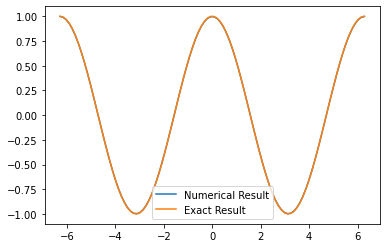

In [20]:
import matplotlib.pyplot as plt
import numpy as np

N = 100 #number of datapoints

x = np.linspace(-2 * np.pi,2 * np.pi, N)
y = np.sin(x)
grad_estimate = np.gradient(y,x)
grad_exact = np.cos(x)
plt.plot(x,grad_estimate)
plt.plot(x,grad_exact)
plt.legend(["Numerical Result","Exact Result"])
plt.show()

# Derivatives in higher dimensions

You've (most likely) seen the term gradient before in your calculus or physics 221 class.  As a reminder, the gradient of a function is a vector field whose value at a point is the vector with components that are partial derivatives of the function $f$.  Mathematically, we write that as:

$
\nabla f\left(x, y, z\right) =  \frac{\partial f}{\partial x} \hat{i} + \frac{\partial f}{\partial y} \hat{j} + \frac{\partial f}{\partial z} \hat{k}
$

For a function that is in Cartesian coordinates in three dimensions.  For example, the function:

$
f\left(x, y, z\right) = 3 x^2 - 4 y  + \sin \left(z\right)
$

has a gradiant of:

$
\nabla f\left(x, y, z\right) = 3 x \hat{i}  - 4 \hat{j} + \cos \left(z\right) \hat{k}
$

An example of gradiants that you would have seen in Physics 221 is calculating the electric field from the electric potential.  In fact, in your homework you will get the opportunity to do just that!

##Aside: Dealing with data in 2D

Here, we're going to deal with 2D data since its easier to visualize than 3D data (although the concepts we discuss are equally valid in three or higher dimensions).  Before worrying about gradients, we need a way to represent 2D data in both the computer and in graphical form.  

To date, we've only delt primarily with 1D arrays.  However, one of the nice things about numpy arrays is that they are easily extendable to higher dimensions.  As a reminder, to create a 2D array we could write something like:

In [21]:
X = np.array([[1, 2, 3], [4, 5, 6]])
print(X)

[[1 2 3]
 [4 5 6]]


Which is basically an array of arrays.  We can access individual elements of this 2D array using notion like this:

In [22]:
print(X[1,2])

6


If you want to model data that comes from a function of two coordinates such as $x$ and $y$, one convenient way to do this is to set up three 2D arrays: one for X, one for Y, and one for the dependent variable Z.  As an example, lets say you want to model the function:

$
z = x^2 + y
$

over the range of $-2\leq x \leq 2$ and $-2\leq y \leq 2$.  For simplicity, lets take datapoints in $x$ and $y$ spaced at intervals of 1.0 (in reality you'd often like finer spacing than this).  To create the 2D arrays, you can define 1D arrays for $x$ and $y$ and use the ```meshgrid``` function:

In [23]:
x = np.arange(-2.0,2.1,.01)
y = np.arange(-2.0,2.1,.01)
print("x = ", x)
print("y = ", y)
X,Y =np.meshgrid(x,y)
print("X =")
print(X)
print("Y =")
print(Y)

x =  [-2.00000000e+00 -1.99000000e+00 -1.98000000e+00 -1.97000000e+00
 -1.96000000e+00 -1.95000000e+00 -1.94000000e+00 -1.93000000e+00
 -1.92000000e+00 -1.91000000e+00 -1.90000000e+00 -1.89000000e+00
 -1.88000000e+00 -1.87000000e+00 -1.86000000e+00 -1.85000000e+00
 -1.84000000e+00 -1.83000000e+00 -1.82000000e+00 -1.81000000e+00
 -1.80000000e+00 -1.79000000e+00 -1.78000000e+00 -1.77000000e+00
 -1.76000000e+00 -1.75000000e+00 -1.74000000e+00 -1.73000000e+00
 -1.72000000e+00 -1.71000000e+00 -1.70000000e+00 -1.69000000e+00
 -1.68000000e+00 -1.67000000e+00 -1.66000000e+00 -1.65000000e+00
 -1.64000000e+00 -1.63000000e+00 -1.62000000e+00 -1.61000000e+00
 -1.60000000e+00 -1.59000000e+00 -1.58000000e+00 -1.57000000e+00
 -1.56000000e+00 -1.55000000e+00 -1.54000000e+00 -1.53000000e+00
 -1.52000000e+00 -1.51000000e+00 -1.50000000e+00 -1.49000000e+00
 -1.48000000e+00 -1.47000000e+00 -1.46000000e+00 -1.45000000e+00
 -1.44000000e+00 -1.43000000e+00 -1.42000000e+00 -1.41000000e+00
 -1.40000000e+00 -1.

Play with the above code and make sure you know what is going on.  The lowercase arrays are 1D and the uppercase are 2D.  For a pair of array elements $i$ and $j$, you can get the corresponding cartesian coordinates by accessing the same array element in $X$ and $Y$.  For example to get the point $\left(x,y\right) = \left(1,2\right)$ you could do:

In [24]:
print(X[4,3],Y[4,3])

-1.97 -1.96


Now that you have these, you can create your corresponding $Z$ values using standard numpy arithmetic.  For example:

In [25]:
Z = X **2 + Y
print(Z)

[[2.     1.9601 1.9204 ... 2.2849 2.3264 2.3681]
 [2.01   1.9701 1.9304 ... 2.2949 2.3364 2.3781]
 [2.02   1.9801 1.9404 ... 2.3049 2.3464 2.3881]
 ...
 [6.07   6.0301 5.9904 ... 6.3549 6.3964 6.4381]
 [6.08   6.0401 6.0004 ... 6.3649 6.4064 6.4481]
 [6.09   6.0501 6.0104 ... 6.3749 6.4164 6.4581]]


For example, to access the value of $Z$ at the point (1,2), you can do:

In [26]:
i = 4
j = 3
print("X =",X[i,j],"Y =",Y[i,j], "Z =",Z[i,j])

X = -1.97 Y = -1.96 Z = 1.9209


**Activity:** Play with the above and make sure you understand how this works.  Try changing the number of points in x and y, and the function for z.  You should be able to access  the point $Z(X,Y)$ using a single set of array indices $i$ and $j$.

Now that you've done this, you'll probably want to plot your data to get an idea of what the function looks like.  One nice way to plot 2D data is with a heatmap.  There are a few ways to do this in python, but the ```pcolormesh``` function works quite well.  Here is an example:

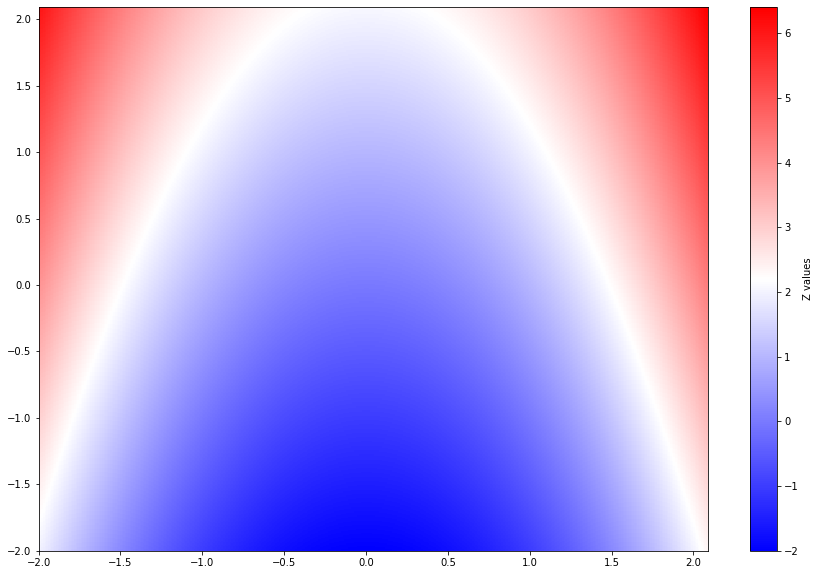

In [27]:
plt.figure(figsize=(15,10)) #sets the size of the plot we are going to make.  Feel free to change this
plt.pcolormesh(X,Y,Z,cmap='bwr') #Makes a heatmap for the data with Z being the dependent variable and X and Y the independent variables.  Sets the way colors are defined. 
plt.colorbar(label='Z values') #Makes a colorbar and labels it
plt.show() #Shows the plot

One interesting thing with this code is the "cmap" argument to the pcolormesh function.  This sets the color scale for the heatmap.  To see the available options, look here:  https://matplotlib.org/stable/tutorials/colors/colormaps.html

**Activity:** Try changing the number of points in X, Y, and Z and replotting.  How does this change your heatmap?  If you want, try changing the colormap as well.

## Using gradient on 2D data

Now that we know how to represent multidimensional data, we can return to our problem of finding gradients.  One of the nice things about the numpy gradient function we looked at above is that it works equally well in multiple dimensions (with one caveat we'll discuss below).  For example, to calculate the $x$ and $y$ components of the gradient, you can use the function:

In [28]:
Z_Y, Z_X = np.gradient(Z,y,x)

Where Z_X is the x-component of the gradient, and Z_Y the y-component.  The major caveat is that you have to flip the order of y and x.  Why is this? There are two answers:

1. For those that just want to move on: Just remember that the order is backwards from what you might expect and that y goes before x.
2.  For those that are curious about the mechanics: Look at the printed arrays of X and Y above.  You'll note that X changes horizontally and Y changes vertically.  Numpy labels the vertical part (going down the rows) as axis 0 and the horizontal part (going across the columns) as axis 1.  The gradient function first performs the difference over axis 0, then axis 1, so it works on the y values first then x.  Confusing? Yes.  But thats the way it is.

Finally, you'll want to plot these gradients (again, think about plotting electric field lines in 221).  There's a nice matplotlib function to do that as well called streamplot. Here is an example:

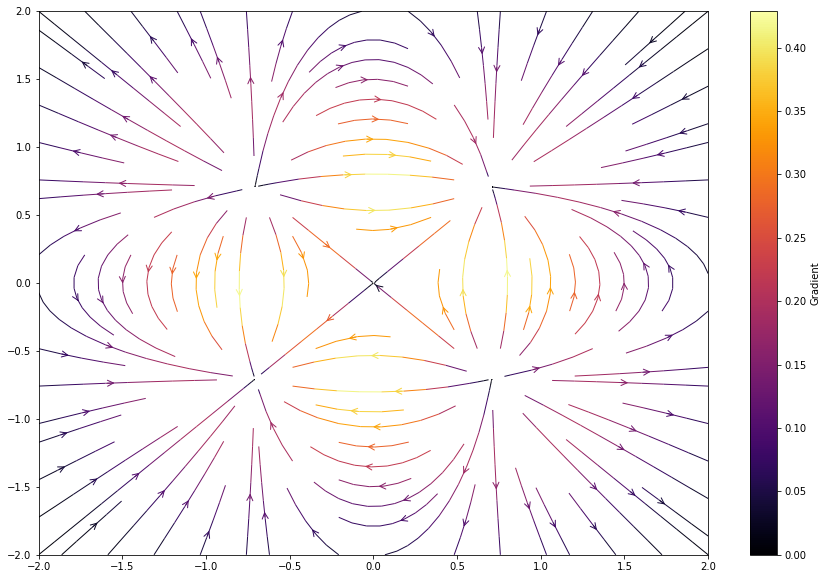

In [38]:
plt.figure(figsize=(15,10)) # set the figure size
colors = np.sqrt(Z_Y**2+Z_X**2) #defines a new array of numbers that will be usefule for adding color to our field lines
plt.streamplot(x,y,Z_X,Z_Y,color=colors, cmap=plt.cm.inferno,linewidth=1,arrowstyle='->',density=1,arrowsize=1.5) #plots the field lines
plt.colorbar(label='Gradient') #makes a colorbar
plt.show() #shows the plot

There is a bunch going on there.  The streamplot function needs four arguments, the x and y values (caveat: it's the 1D x and y arrays, NOT the 2D X and Y), and the gradients you previously computed.  Then there are some nice/useful options.  The color option adds some color to the field lines, and the values of those colors are defined the line above as the magnitude of the field at a point. The other arguments will change the style of the lines, affecting things such as their width, density, or how arrows are drawn.  Feel free to play with these options to see how they change your plot.

If you want to be really fancy, you can plot the field lines over the original data by just issuing both commands:

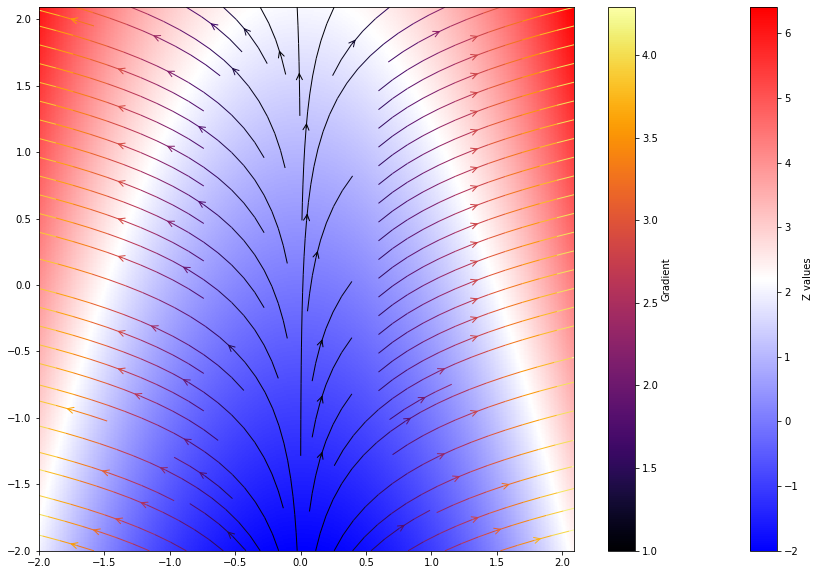

In [30]:
plt.figure(figsize=(15,10))
plt.pcolormesh(X,Y,Z,cmap='bwr')
plt.colorbar(label='Z values')
plt.streamplot(x,y,Z_X,Z_Y,color=colors,cmap=plt.cm.inferno,linewidth=1,arrowstyle='->',density=1,arrowsize=1.5)
plt.colorbar(label='Gradient')
plt.show()

## Activity

Using what we've talked about above, do the following:


1.   Plot a heatmap of the function $Z = x \cdot y \cdot e^{-\left(x^2+y^2\right)}$ with $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$.  Use a grid spacing of $dx = dy = .01$ 
2.   Use the gradient function to calculate the gradient of this function over the same area.  Plot the field lines using the streamplot function.
3.  Overlay the two plots.  Do the resulting gradient lines make sense for the original function?


In [31]:
import numpy as np
import matplotlib.pyplot as plt

Set the min and max values along $x$ and $y$, along with the number of gridpoints to use

In [32]:
x_min = -2.0
x_max =  2.0
y_min = -2.0
y_max =  2.0
dx    =  201
dy    =  201

First make your meshes of $x$ and $y$ values.  Lowercase variables will store 1D arrays, while uppercase will be 2D.  

Then use this to calculate your function:

$
Z = x \cdot y \cdot e^{-\left(x^2+y^2\right)}
$

Plot the results using pcolormesh

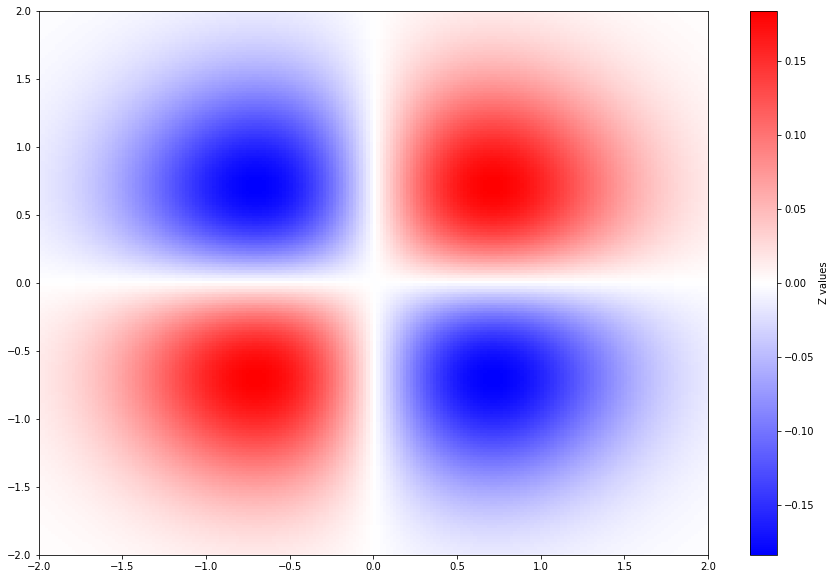

In [33]:
x = np.linspace(x_min,x_max,dx)
y = np.linspace(y_min,y_max,dy)
X, Y = np.meshgrid(x,y)

Z= X*Y*np.exp(-(X**2+Y**2))
plt.figure(figsize=(15,10))
plt.pcolormesh(X,Y,Z,cmap='bwr')
plt.colorbar(label='Z values')
plt.show()

Now use the above to calculate the gradient at each point.  Plot it.

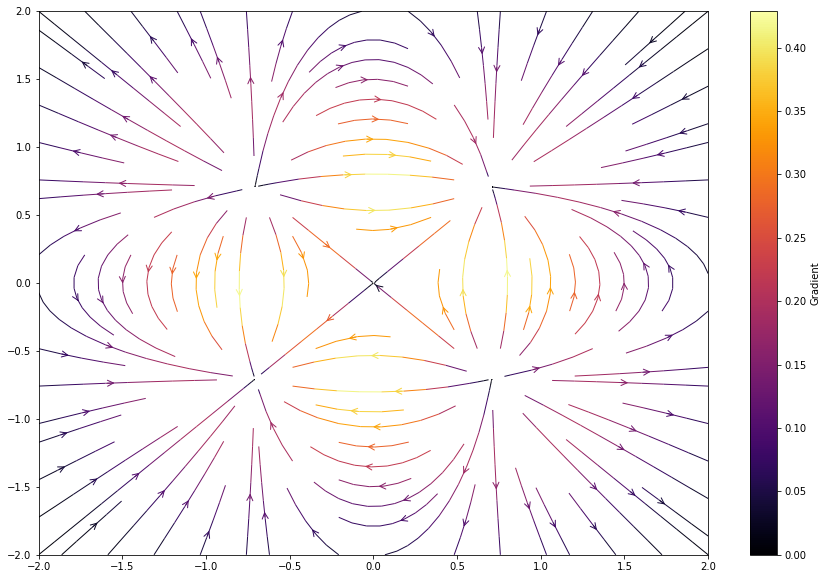

In [34]:
Z_Y, Z_X = np.gradient(Z,y,x)
plt.figure(figsize=(15,10))
color = np.sqrt(Z_Y**2+Z_X**2)
plt.streamplot(x,y,Z_X,Z_Y,color=color,cmap=plt.cm.inferno,linewidth=1,arrowstyle='->',density=1,arrowsize=1.5)
plt.colorbar(label='Gradient')
plt.show()

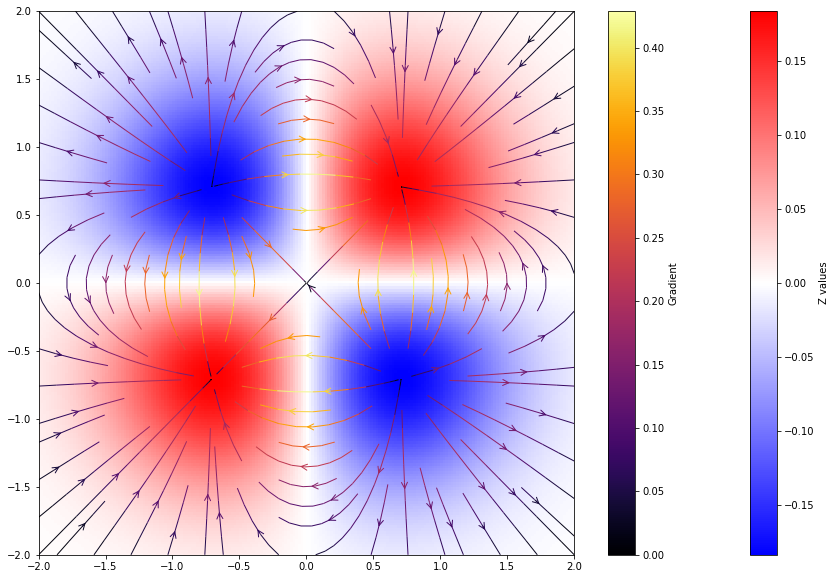

In [42]:
plt.figure(figsize=(15,10))
plt.pcolormesh(X,Y,Z,cmap='bwr')
plt.colorbar(label='Z values')
plt.streamplot(x,y,Z_X,Z_Y,color=color,cmap=plt.cm.inferno,linewidth=1,arrowstyle='->',density=1,arrowsize=1.5)
plt.colorbar(label='Gradient')
plt.show()